#### **Análisis académico de los estudiantes en el primer semestre**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

In [5]:
df = pd.read_csv('../data_raw/dataset.csv')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,5,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,10,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,10,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,5,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


**Extraer caraterísticas**

In [6]:
firstSemester_features = df.loc[df['Target']=='Dropout',['Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)',
                                                         'Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)',
                                                         'Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)']]

In [10]:
print(f'Numero de estudiantes: {len(firstSemester_features)}')

Numero de estudiantes: 1421


In [11]:
firstSemester_features.describe()

,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations)
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.609430,5.821253,7.751583,2.551724,7.256656,0.192118
std,2.104695,2.326304,4.921590,2.857588,6.031120,0.794591
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000
50%,0.000000,6.000000,8.000000,2.000000,10.928571,0.000000
75%,0.000000,6.000000,11.000000,4.000000,12.200000,0.000000
max,18.000000,21.000000,31.000000,21.000000,18.000000,8.000000


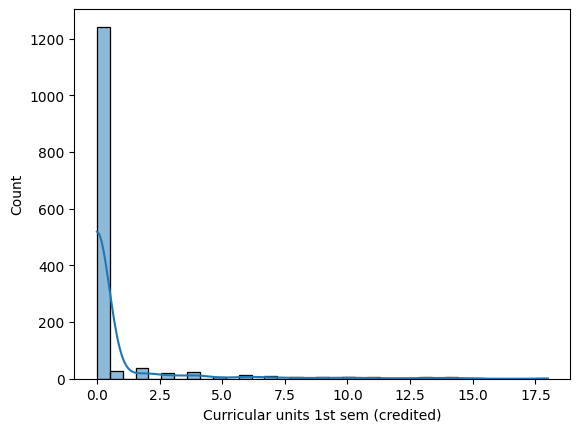

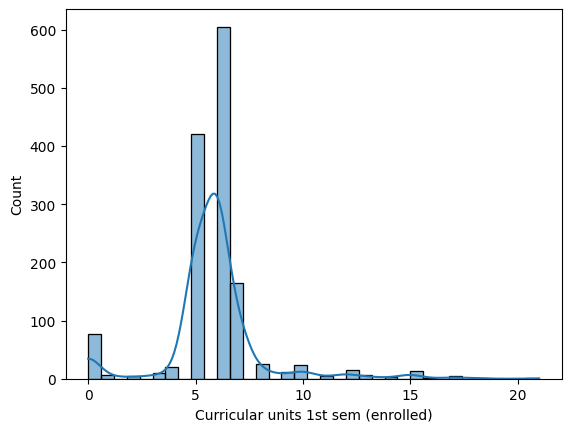

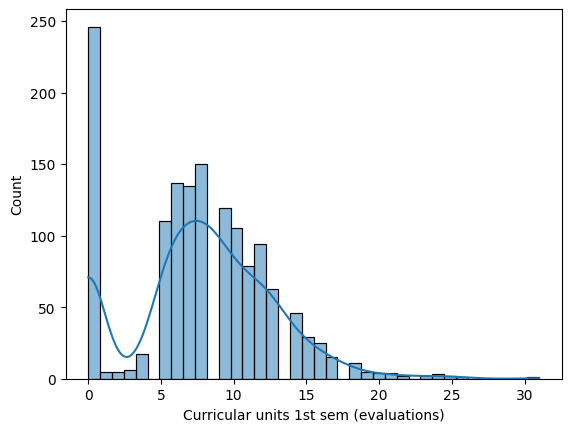

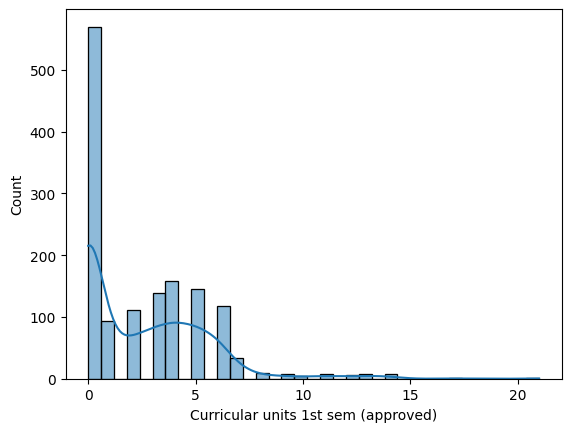

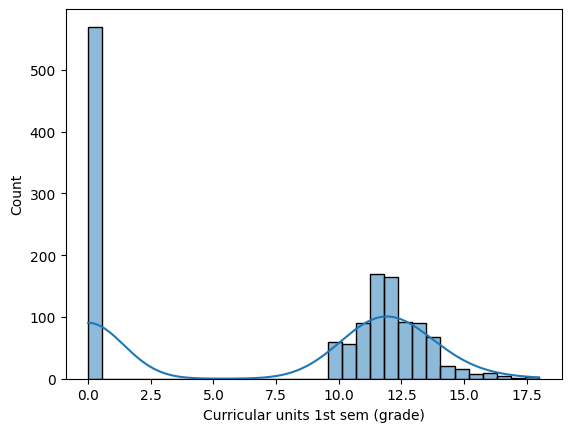

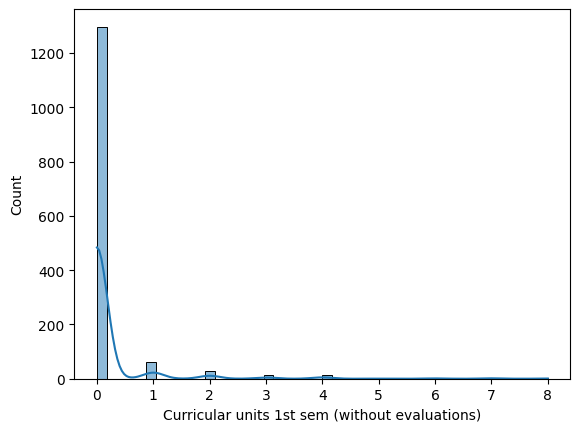

In [8]:
for i in firstSemester_features.columns:
    sns.histplot(data=firstSemester_features, x=i, kde=True, bins=len(i))
    plt.show()

**Observaciónes:**
- La gran mayoría de estudiantes no recuperó ningún crédito al finalizar el 1º semestre de sus estudios.
- Cursaron entre 5 y 6 asignaturas/unidades (algunos más otros menos).
- Aproximadamente 250 estudiantes no han sido evaluados aún, mientras que el resto se le han evaluado entre 5-11 unidades (mayoría).
- La mayoría no han aprobado ninguna unidad, el resto se situa entre 2-4 unidades.
- La calificacion mayoritaria es de 0, los aprobados comprenden en un rango de 10-12 puntos (en Portugal se evalua diferente a España).
- La mayoría de estudiantes ya ha sido evaluado de todas las unidades, algunos quedan pendientes 1 o 2.

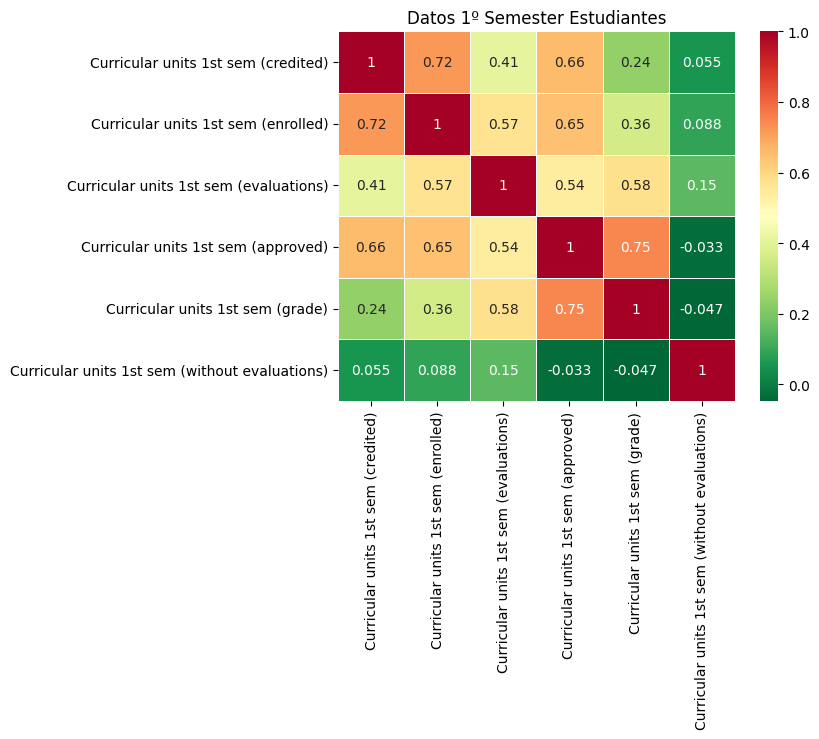

In [17]:
# Mapa de correlaciones entre caractersticas
firstSemester_corr = firstSemester_features.corr()
#mask = np.triu(np.ones_like(firstSemester_corr, dtype=bool))
sns.heatmap(data=firstSemester_corr,cmap='RdYlGn_r', annot=True, linewidths=.5)
plt.title('Datos 1º Semester Estudiantes')
plt.show()

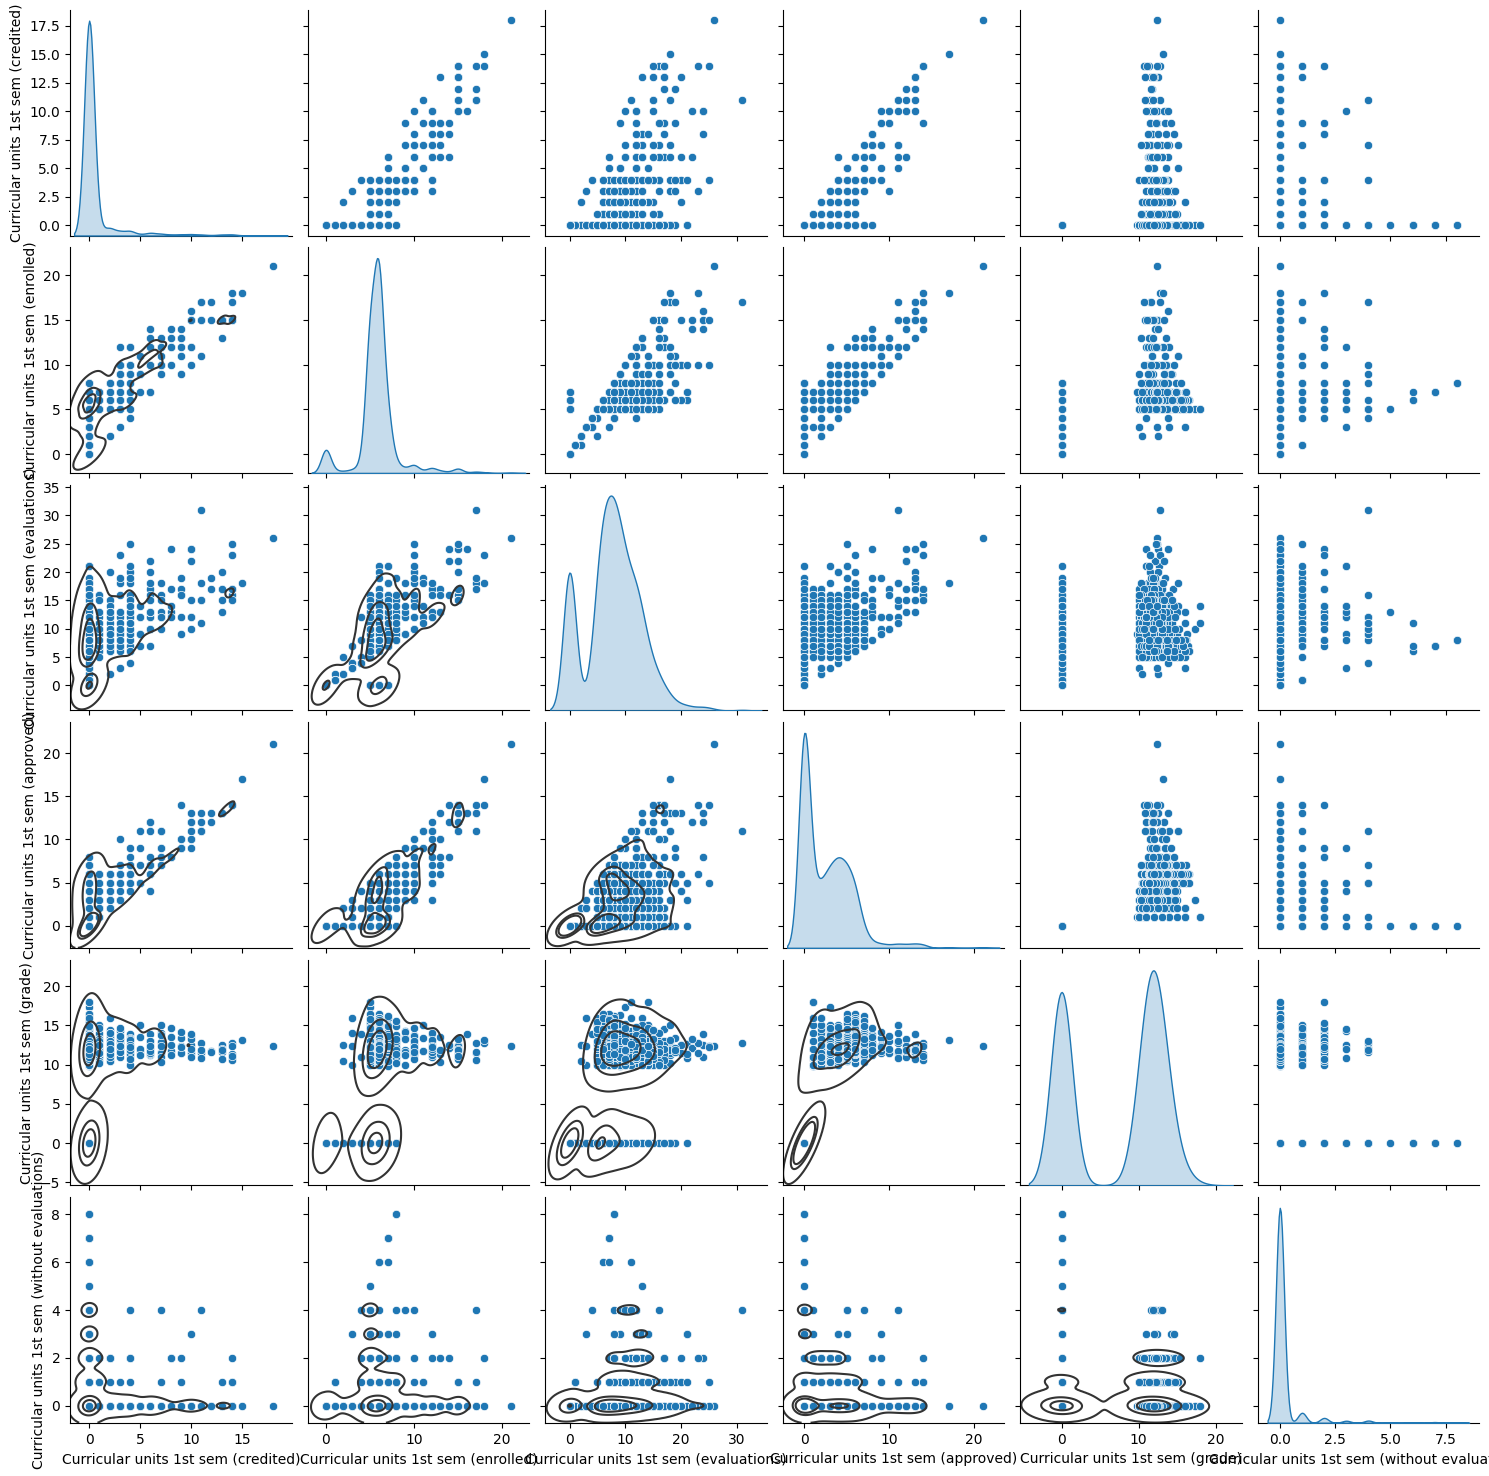

In [16]:
g=sns.pairplot(firstSemester_features, diag_kind='kde')
g.map_lower(sns.kdeplot, levels=4, color=".2")

Observaciones:
- La correlacion entre credited y enrolled muestra como los estudiantes inscritos en más de 10 asignaturas, tienden a recuperar lso creditos de las mismas (frente al resto que se mantienen sin recuparación).
- Conforme aprueban, van obteniendo creditos (algunas asignaturas parecen no creditadas).
- Encontramos estudiantes que matriculandose en el rango 5-6 unidades, no aprobaron, mientras que como dijimos en el primer punto, los que superan las 10 asignaturas lográn aprobar mas unidades.
- el numero de unidades aprobadas no difiere de una calificación mayor (encontramos casos donde aprueban 10 asignaturas con un suficiente en la calificación).